In [29]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Clean the data 
df = df.dropna()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# Replace the Species names with the numbers, in order to be able to create the heatmap 
df['Species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[1, 2, 3], inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


<Axes: >

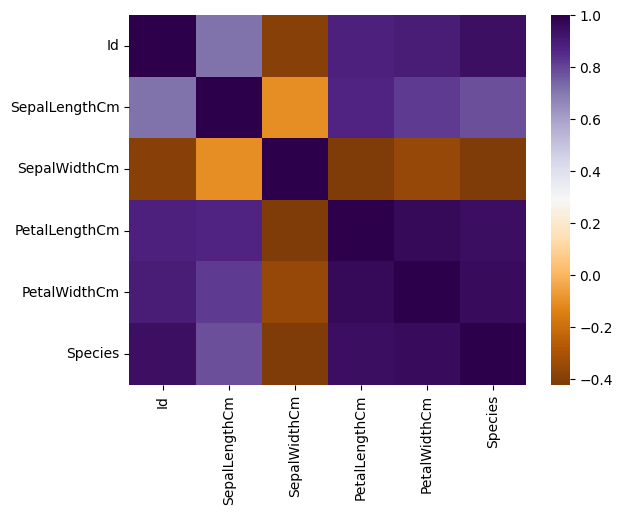

In [32]:
# Create the heatmap of all variables in the data frame 
corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap='PuOr')

In [33]:
# Drop any colums, that are not necessary 
df = df.drop(columns=['Id'])

## Apply PCA

In [34]:
# Select and standardize features
X = StandardScaler().fit_transform(df.values)

# Choose number of components to be generated
pca = PCA(n_components = 3)

# Obtain components
principal_components = pca.fit_transform(X)

# Transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components,index = df['Species'])

pca_df.head()

,0,1,2
Species,,,
1,-2.576198,0.498650,-0.047863
1,-2.419715,-0.660518,-0.195736
1,-2.662302,-0.326611,0.120244
1,-2.605790,-0.582925,0.142038
1,-2.683088,0.666354,0.109300


<Axes: >

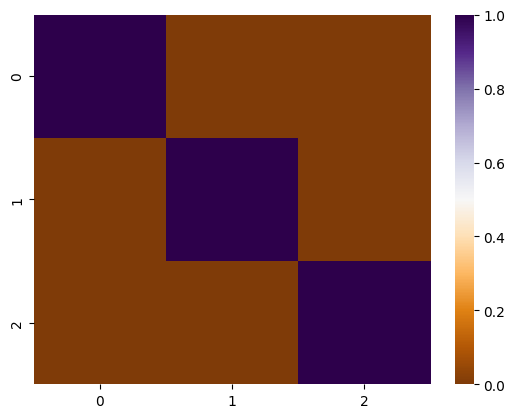

In [35]:
# Create a heat map of pca components 
new_heatmap=pca_df.corr()
sns.heatmap(new_heatmap, cmap='PuOr')

### Interpreting PCA

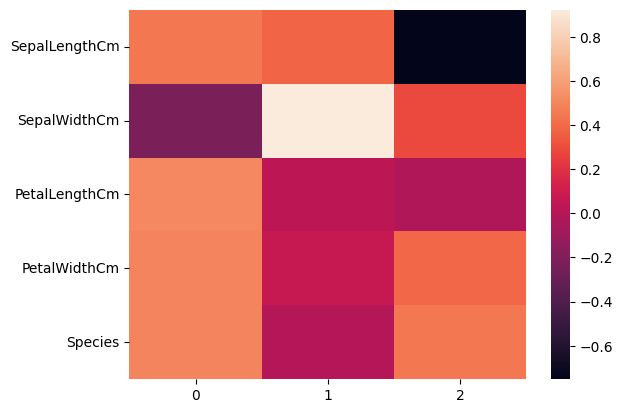

In [36]:
# Create a heatmap comparing the variable correlation with the PCA components 
components = pd.DataFrame(pca.components_, columns=df.columns).transpose()
ax = sns.heatmap(components)
plt.show()

If we are to keep the variables with a colour representation of a correlation of 0.0, excluding the positive correlation close to 1.0 colour representation as well as a negative correlation between variables with a colour representation close to - 1.0. Looking at component 1 correlation with the variables, the wanted colour representation is seen with the most variables, except SepalWidthCm and SepalLengthCm.